Processing FloorSet-Lite Batches:  99% 980/985 [03:10<00:00,  5.01it/s]

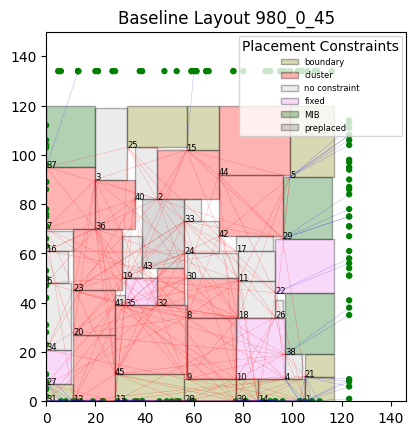

Processing FloorSet-Lite Batches:  99% 980/985 [03:12<00:00,  5.09it/s]


In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import torch
from torch.utils.data import DataLoader
from tqdm import tqdm 
from lite_dataset import FloorplanDataset, floorplan_collate
from visualize import visualize_lite


root = './'
ds = FloorplanDataset(root)
# Avoid shuffling to make file caching more effective
dl = DataLoader(ds, batch_size=1024, shuffle=False,
                collate_fn=floorplan_collate)

# A minibatch can contain floorplans with different number of blocks or pins
# All tensors in a minibatch are padded to the maximum number of blocks and pins in the minibatch
# The padding for the LongTensors is -1, for the bool tensors it is False
for batch_idx, batch in tqdm(enumerate(dl), total=len(dl), desc='Processing FloorSet-Lite Batches'):
    ##print('calling batch:', batch_idx)
    (
        area_target,   # bsz x n_blocks. The area target values for each block
        b2b_connectivity,  # bsz x b2b_edges x weight. The block-to-block connectivity
        p2b_connectivity,  # bsz x p2b_edges x weight. The pin-block connectivity
        pins_pos,  # bsz x n_pins x 2. The pins location
        placement_constraints, # bsz x n_blocks x 5. [fixed, preplaced, multi-instantiation, cluster, boundary]
        tree_sol, # bsz x (n_blocks-1) x 3. The B*Tree representation of the floorplans (rectangular partitions + compact floorplans)
        fp_sol, # bsz x n_blocks x 4. The size(:,:,:2) and the ground truth position(:,:,2:4) of the blocks
        metrics_sol # [area, num_pins, num_total_nets, num_b2b_nets, num_p2b_nets, num_hardconstraints, b2b_weighted_wl, p2b_weighted_wl]
    ) = batch
    ##del batch
    
    # print(
    #     f'area targets: {area_target.size()}', 
    #     f'b2b_connectivity: {b2b_connectivity.size()}', 
    #     f'p2b_connectivity: {p2b_connectivity.size()}', 
    #     f'pins_pos: {pins_pos.size()}', 
    #     f'placement_constraints: {placement_constraints.size()}', 
    #     f'target floorplan solution: {fp_sol.size()}', 
    #     f'target tree solution: {tree_sol.size()}', 
    #     f'target metrics: {metrics_sol.size()}', 
    #     )

    if batch_idx < 980:
        continue
    
    ##Visualize results of the first samples of each batch
    target_row = torch.tensor([-1, -1, -1, -1])
    for vis_ind in range(1):
        mask = ~torch.all(fp_sol[vis_ind] == target_row, dim=1)
        num_blocks = torch.sum(mask).item()
        layout_ind = str(batch_idx)+'_'+str(vis_ind)+'_'+str(num_blocks)
        visualize_lite(
            fp_sol[vis_ind], 
            b2b_connectivity[vis_ind], 
            p2b_connectivity[vis_ind], 
            pins_pos[vis_ind], 
            placement_constraints[vis_ind],
            layout_ind
        )

    if batch_idx == 980:
        break




Downloaded 0.06 GB: 100% 68/68 [00:01<00:00, 41.25it/s]


Downloaded floorplan data to ./LiteTensorDataTest.tgz
Unpacking. This may take a while


Processing FloorSet-Prime Batches:   0% 0/100 [00:00<?, ?it/s]

area-target data: torch.Size([1, 21]), pins_pos: torch.Size([1, 68, 2]), b2b_connectivity: torch.Size([1, 44, 3]), p2b_connectivity: torch.Size([1, 85, 3]), placement_constraints: torch.Size([1, 21, 5]) polygon_shapes: 21


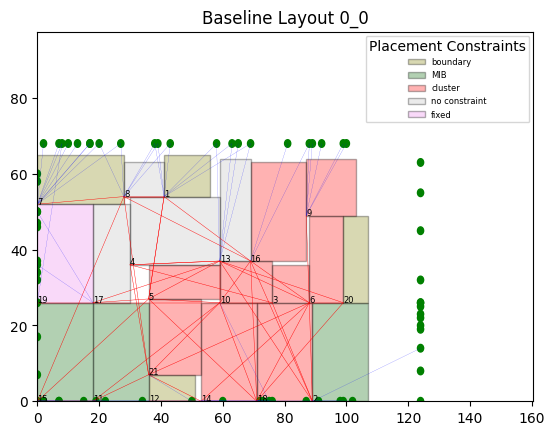

Processing FloorSet-Prime Batches:   1% 1/100 [00:00<01:06,  1.48it/s]

area-target data: torch.Size([1, 22]), pins_pos: torch.Size([1, 81, 2]), b2b_connectivity: torch.Size([1, 29, 3]), p2b_connectivity: torch.Size([1, 133, 3]), placement_constraints: torch.Size([1, 22, 5]) polygon_shapes: 22


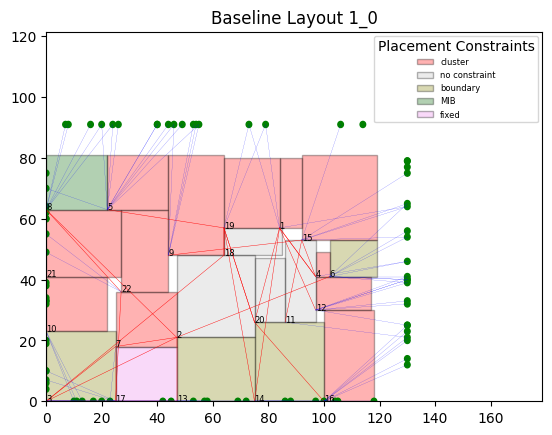

Processing FloorSet-Prime Batches:   2% 2/100 [00:01<01:03,  1.54it/s]

area-target data: torch.Size([1, 23]), pins_pos: torch.Size([1, 88, 2]), b2b_connectivity: torch.Size([1, 52, 3]), p2b_connectivity: torch.Size([1, 180, 3]), placement_constraints: torch.Size([1, 23, 5]) polygon_shapes: 23


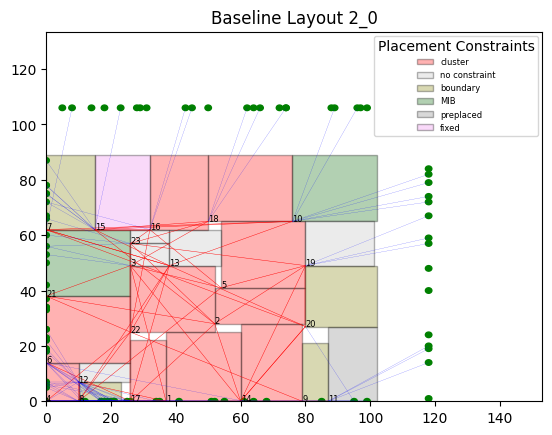

Processing FloorSet-Prime Batches:   3% 3/100 [00:02<01:05,  1.47it/s]

area-target data: torch.Size([1, 24]), pins_pos: torch.Size([1, 83, 2]), b2b_connectivity: torch.Size([1, 34, 3]), p2b_connectivity: torch.Size([1, 3, 3]), placement_constraints: torch.Size([1, 24, 5]) polygon_shapes: 24


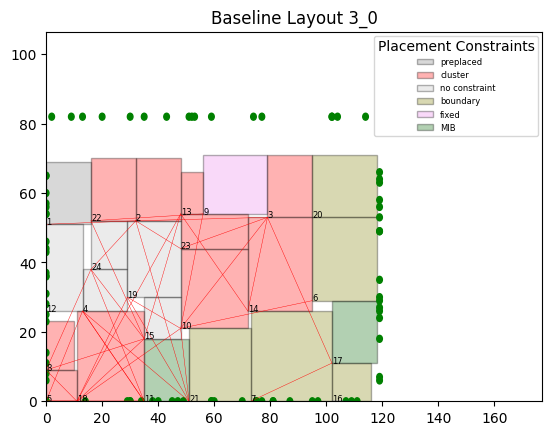

Processing FloorSet-Prime Batches:   4% 4/100 [00:02<01:03,  1.50it/s]

area-target data: torch.Size([1, 25]), pins_pos: torch.Size([1, 50, 2]), b2b_connectivity: torch.Size([1, 131, 3]), p2b_connectivity: torch.Size([1, 111, 3]), placement_constraints: torch.Size([1, 25, 5]) polygon_shapes: 25


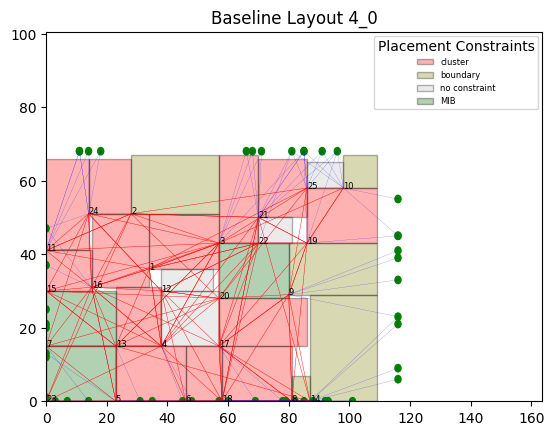

Processing FloorSet-Prime Batches:   5% 5/100 [00:03<01:00,  1.58it/s]

area-target data: torch.Size([1, 26]), pins_pos: torch.Size([1, 94, 2]), b2b_connectivity: torch.Size([1, 74, 3]), p2b_connectivity: torch.Size([1, 183, 3]), placement_constraints: torch.Size([1, 26, 5]) polygon_shapes: 26


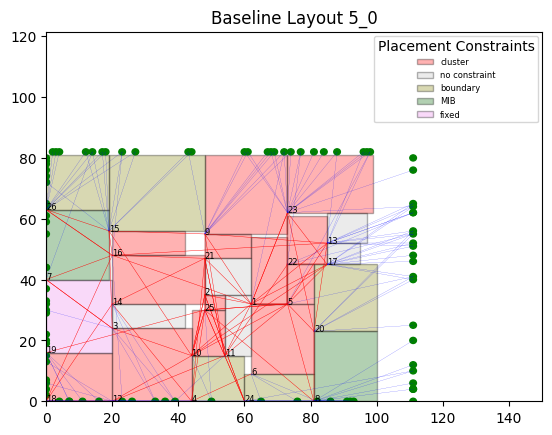

Processing FloorSet-Prime Batches:   6% 6/100 [00:04<01:03,  1.48it/s]

area-target data: torch.Size([1, 27]), pins_pos: torch.Size([1, 64, 2]), b2b_connectivity: torch.Size([1, 145, 3]), p2b_connectivity: torch.Size([1, 34, 3]), placement_constraints: torch.Size([1, 27, 5]) polygon_shapes: 27


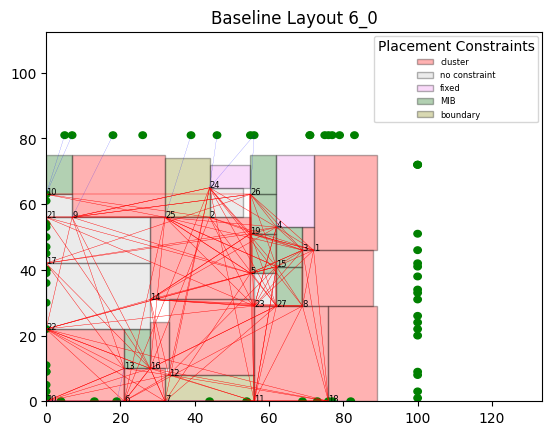

Processing FloorSet-Prime Batches:   7% 7/100 [00:04<01:03,  1.46it/s]

area-target data: torch.Size([1, 28]), pins_pos: torch.Size([1, 104, 2]), b2b_connectivity: torch.Size([1, 384, 3]), p2b_connectivity: torch.Size([1, 5, 3]), placement_constraints: torch.Size([1, 28, 5]) polygon_shapes: 28


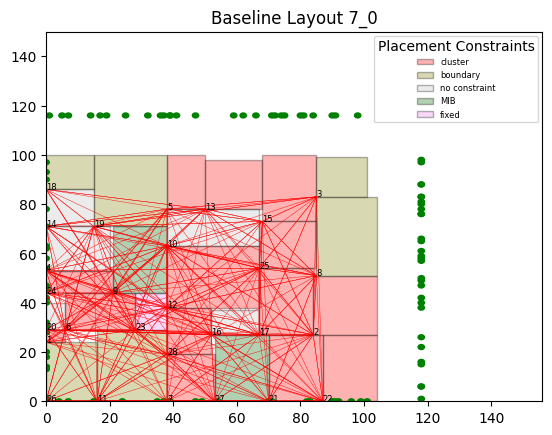

Processing FloorSet-Prime Batches:   8% 8/100 [00:05<01:08,  1.33it/s]

area-target data: torch.Size([1, 29]), pins_pos: torch.Size([1, 90, 2]), b2b_connectivity: torch.Size([1, 176, 3]), p2b_connectivity: torch.Size([1, 60, 3]), placement_constraints: torch.Size([1, 29, 5]) polygon_shapes: 29


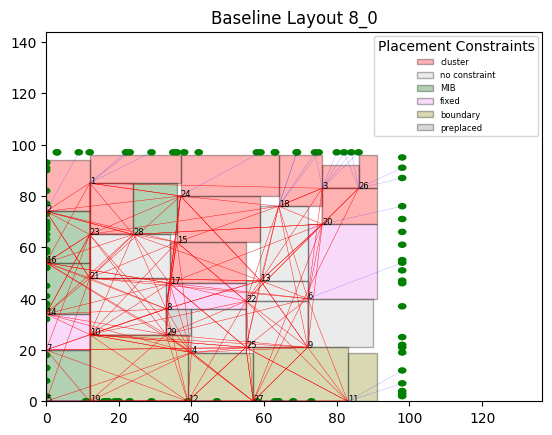

Processing FloorSet-Prime Batches:   9% 9/100 [00:06<01:07,  1.34it/s]

area-target data: torch.Size([1, 30]), pins_pos: torch.Size([1, 93, 2]), b2b_connectivity: torch.Size([1, 189, 3]), p2b_connectivity: torch.Size([1, 50, 3]), placement_constraints: torch.Size([1, 30, 5]) polygon_shapes: 30


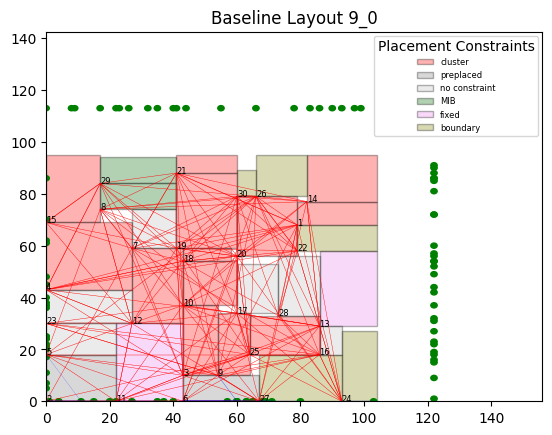

Processing FloorSet-Prime Batches:  10% 10/100 [00:07<01:10,  1.28it/s]

area-target data: torch.Size([1, 31]), pins_pos: torch.Size([1, 82, 2]), b2b_connectivity: torch.Size([1, 57, 3]), p2b_connectivity: torch.Size([1, 226, 3]), placement_constraints: torch.Size([1, 31, 5]) polygon_shapes: 31


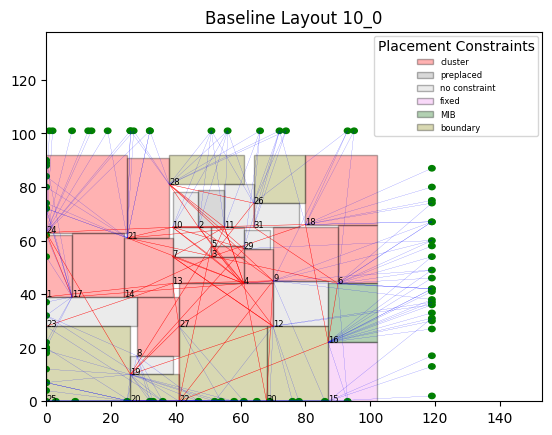

Processing FloorSet-Prime Batches:  11% 11/100 [00:07<01:08,  1.30it/s]

area-target data: torch.Size([1, 32]), pins_pos: torch.Size([1, 110, 2]), b2b_connectivity: torch.Size([1, 102, 3]), p2b_connectivity: torch.Size([1, 7, 3]), placement_constraints: torch.Size([1, 32, 5]) polygon_shapes: 32


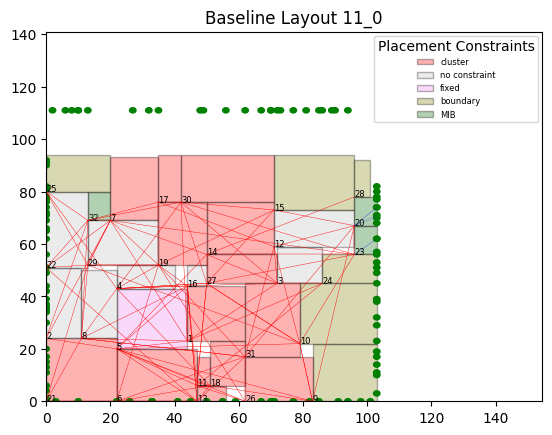

Processing FloorSet-Prime Batches:  12% 12/100 [00:08<01:06,  1.33it/s]

area-target data: torch.Size([1, 33]), pins_pos: torch.Size([1, 125, 2]), b2b_connectivity: torch.Size([1, 76, 3]), p2b_connectivity: torch.Size([1, 367, 3]), placement_constraints: torch.Size([1, 33, 5]) polygon_shapes: 33


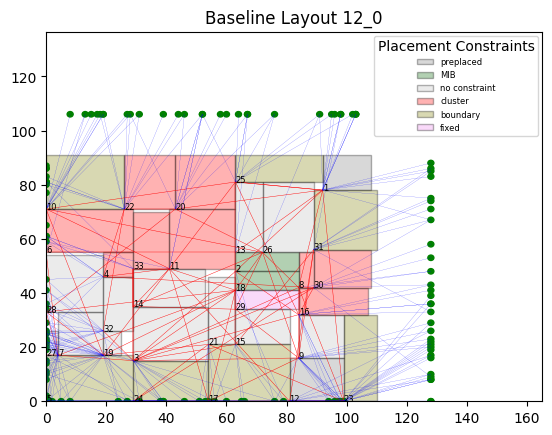

Processing FloorSet-Prime Batches:  13% 13/100 [00:09<01:15,  1.15it/s]

area-target data: torch.Size([1, 34]), pins_pos: torch.Size([1, 79, 2]), b2b_connectivity: torch.Size([1, 138, 3]), p2b_connectivity: torch.Size([1, 161, 3]), placement_constraints: torch.Size([1, 34, 5]) polygon_shapes: 34


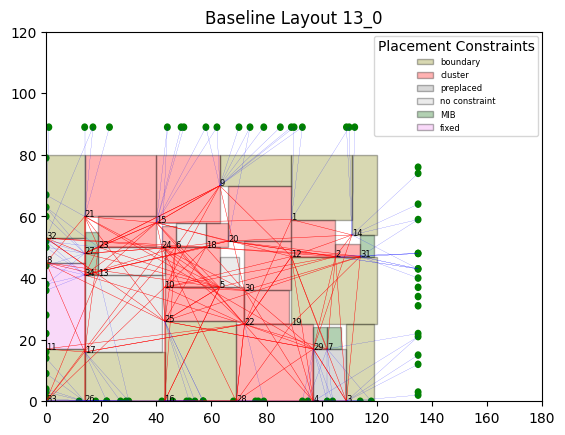

Processing FloorSet-Prime Batches:  14% 14/100 [00:10<01:11,  1.20it/s]

area-target data: torch.Size([1, 35]), pins_pos: torch.Size([1, 135, 2]), b2b_connectivity: torch.Size([1, 257, 3]), p2b_connectivity: torch.Size([1, 85, 3]), placement_constraints: torch.Size([1, 35, 5]) polygon_shapes: 35


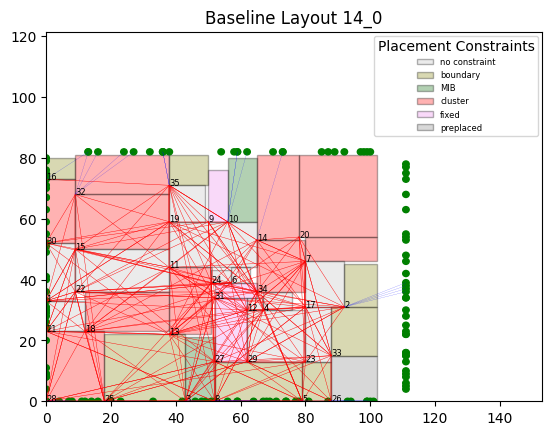

Processing FloorSet-Prime Batches:  15% 15/100 [00:11<01:17,  1.10it/s]

area-target data: torch.Size([1, 36]), pins_pos: torch.Size([1, 110, 2]), b2b_connectivity: torch.Size([1, 272, 3]), p2b_connectivity: torch.Size([1, 79, 3]), placement_constraints: torch.Size([1, 36, 5]) polygon_shapes: 36


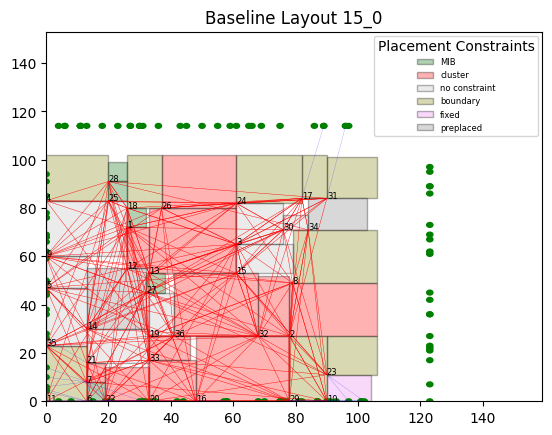

Processing FloorSet-Prime Batches:  16% 16/100 [00:12<01:16,  1.10it/s]

area-target data: torch.Size([1, 37]), pins_pos: torch.Size([1, 88, 2]), b2b_connectivity: torch.Size([1, 273, 3]), p2b_connectivity: torch.Size([1, 58, 3]), placement_constraints: torch.Size([1, 37, 5]) polygon_shapes: 37


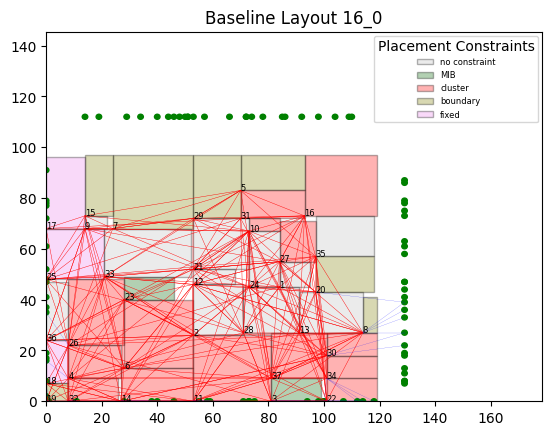

Processing FloorSet-Prime Batches:  17% 17/100 [00:13<01:16,  1.09it/s]

area-target data: torch.Size([1, 38]), pins_pos: torch.Size([1, 108, 2]), b2b_connectivity: torch.Size([1, 101, 3]), p2b_connectivity: torch.Size([1, 73, 3]), placement_constraints: torch.Size([1, 38, 5]) polygon_shapes: 38


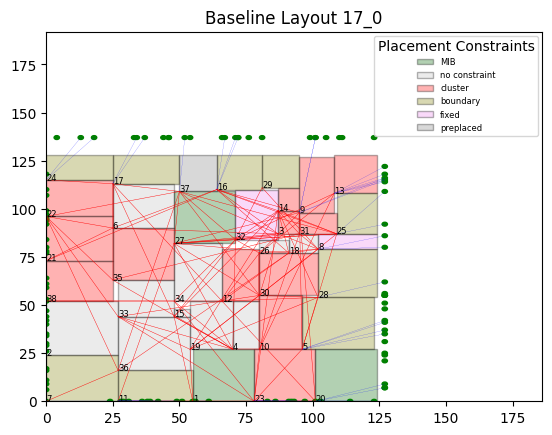

Processing FloorSet-Prime Batches:  18% 18/100 [00:14<01:11,  1.14it/s]

area-target data: torch.Size([1, 39]), pins_pos: torch.Size([1, 97, 2]), b2b_connectivity: torch.Size([1, 91, 3]), p2b_connectivity: torch.Size([1, 87, 3]), placement_constraints: torch.Size([1, 39, 5]) polygon_shapes: 39


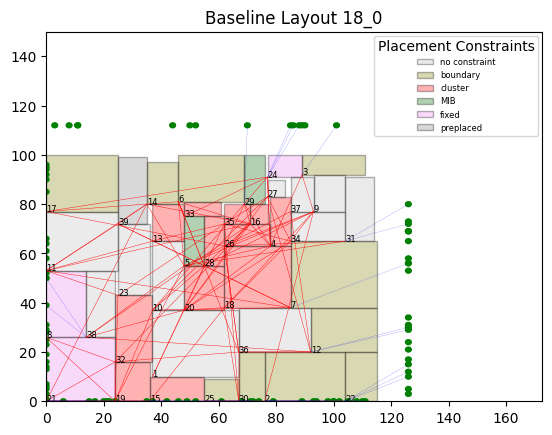

Processing FloorSet-Prime Batches:  19% 19/100 [00:15<01:11,  1.14it/s]

area-target data: torch.Size([1, 40]), pins_pos: torch.Size([1, 107, 2]), b2b_connectivity: torch.Size([1, 176, 3]), p2b_connectivity: torch.Size([1, 85, 3]), placement_constraints: torch.Size([1, 40, 5]) polygon_shapes: 40


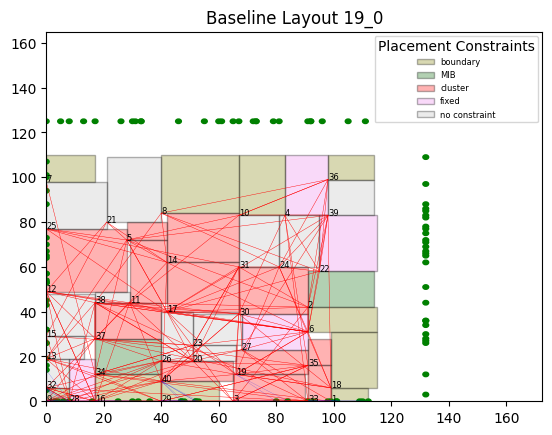

Processing FloorSet-Prime Batches:  20% 20/100 [00:15<01:09,  1.15it/s]

area-target data: torch.Size([1, 41]), pins_pos: torch.Size([1, 132, 2]), b2b_connectivity: torch.Size([1, 100, 3]), p2b_connectivity: torch.Size([1, 481, 3]), placement_constraints: torch.Size([1, 41, 5]) polygon_shapes: 41


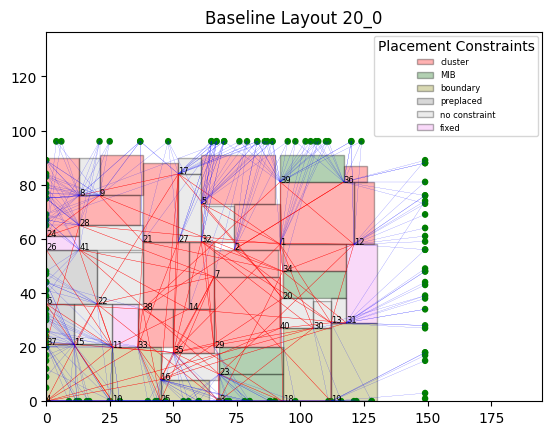

Processing FloorSet-Prime Batches:  21% 21/100 [00:17<01:18,  1.00it/s]

area-target data: torch.Size([1, 42]), pins_pos: torch.Size([1, 119, 2]), b2b_connectivity: torch.Size([1, 123, 3]), p2b_connectivity: torch.Size([1, 374, 3]), placement_constraints: torch.Size([1, 42, 5]) polygon_shapes: 42


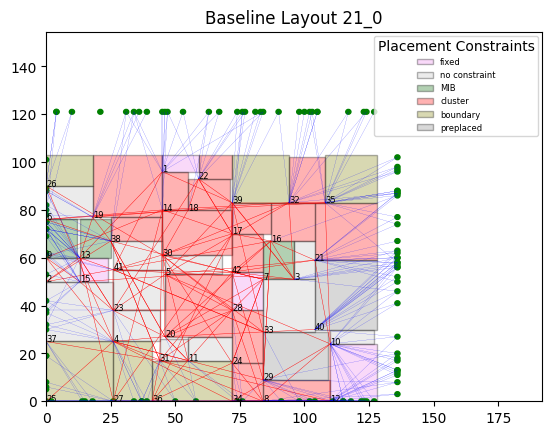

Processing FloorSet-Prime Batches:  22% 22/100 [00:18<01:19,  1.02s/it]

area-target data: torch.Size([1, 43]), pins_pos: torch.Size([1, 88, 2]), b2b_connectivity: torch.Size([1, 221, 3]), p2b_connectivity: torch.Size([1, 87, 3]), placement_constraints: torch.Size([1, 43, 5]) polygon_shapes: 43


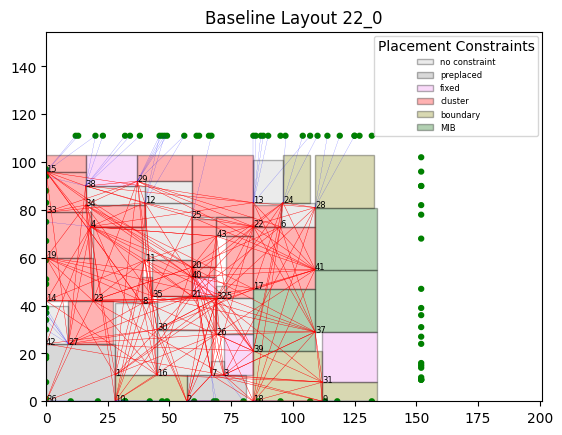

Processing FloorSet-Prime Batches:  23% 23/100 [00:19<01:16,  1.00it/s]

area-target data: torch.Size([1, 44]), pins_pos: torch.Size([1, 121, 2]), b2b_connectivity: torch.Size([1, 948, 3]), p2b_connectivity: torch.Size([1, 399, 3]), placement_constraints: torch.Size([1, 44, 5]) polygon_shapes: 44


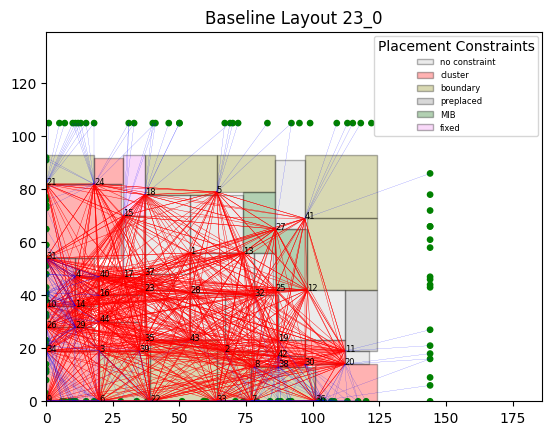

Processing FloorSet-Prime Batches:  24% 24/100 [00:21<01:33,  1.24s/it]

area-target data: torch.Size([1, 45]), pins_pos: torch.Size([1, 118, 2]), b2b_connectivity: torch.Size([1, 202, 3]), p2b_connectivity: torch.Size([1, 318, 3]), placement_constraints: torch.Size([1, 45, 5]) polygon_shapes: 45


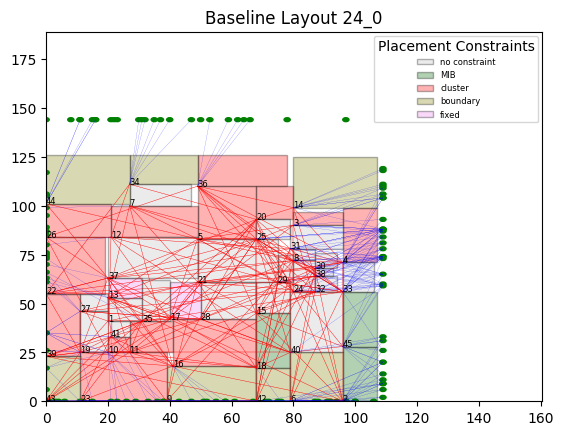

Processing FloorSet-Prime Batches:  25% 25/100 [00:22<01:32,  1.23s/it]

area-target data: torch.Size([1, 46]), pins_pos: torch.Size([1, 162, 2]), b2b_connectivity: torch.Size([1, 444, 3]), p2b_connectivity: torch.Size([1, 149, 3]), placement_constraints: torch.Size([1, 46, 5]) polygon_shapes: 46


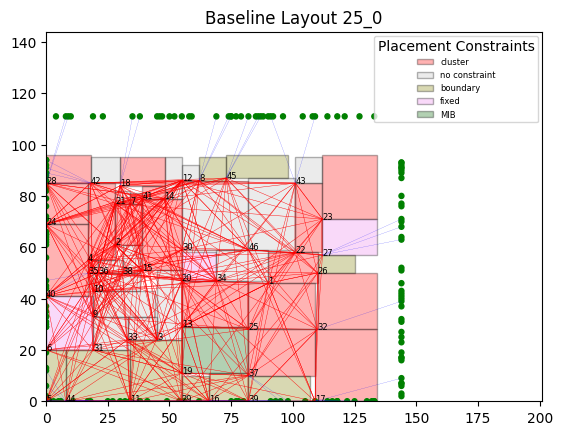

Processing FloorSet-Prime Batches:  26% 26/100 [00:23<01:34,  1.28s/it]

area-target data: torch.Size([1, 47]), pins_pos: torch.Size([1, 130, 2]), b2b_connectivity: torch.Size([1, 220, 3]), p2b_connectivity: torch.Size([1, 109, 3]), placement_constraints: torch.Size([1, 47, 5]) polygon_shapes: 47


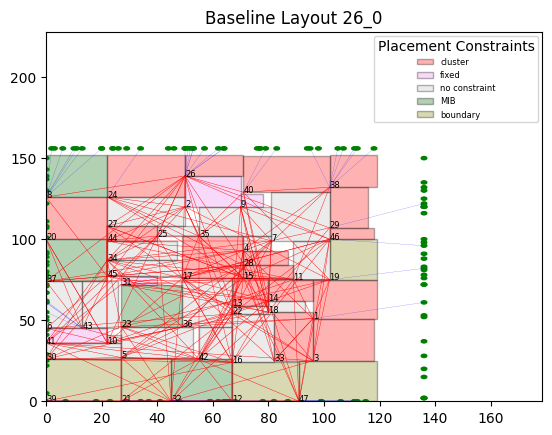

Processing FloorSet-Prime Batches:  27% 27/100 [00:24<01:26,  1.19s/it]

area-target data: torch.Size([1, 48]), pins_pos: torch.Size([1, 96, 2]), b2b_connectivity: torch.Size([1, 276, 3]), p2b_connectivity: torch.Size([1, 92, 3]), placement_constraints: torch.Size([1, 48, 5]) polygon_shapes: 48


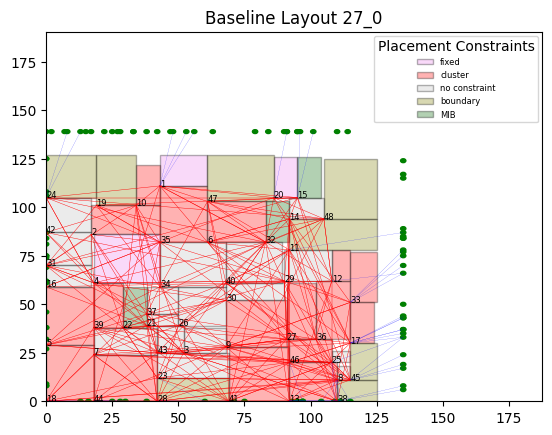

Processing FloorSet-Prime Batches:  28% 28/100 [00:25<01:22,  1.14s/it]

area-target data: torch.Size([1, 49]), pins_pos: torch.Size([1, 143, 2]), b2b_connectivity: torch.Size([1, 120, 3]), p2b_connectivity: torch.Size([1, 525, 3]), placement_constraints: torch.Size([1, 49, 5]) polygon_shapes: 49


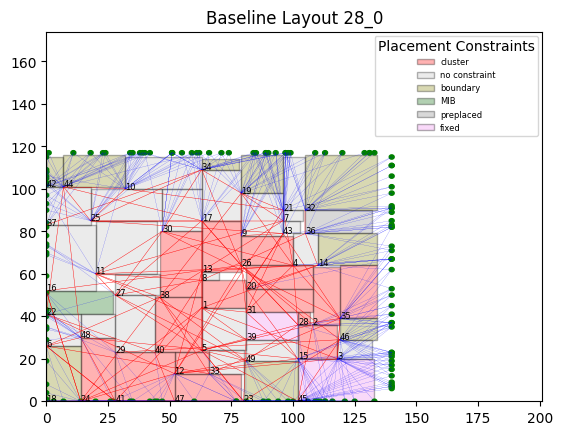

Processing FloorSet-Prime Batches:  29% 29/100 [00:27<01:24,  1.19s/it]

area-target data: torch.Size([1, 50]), pins_pos: torch.Size([1, 124, 2]), b2b_connectivity: torch.Size([1, 175, 3]), p2b_connectivity: torch.Size([1, 111, 3]), placement_constraints: torch.Size([1, 50, 5]) polygon_shapes: 50


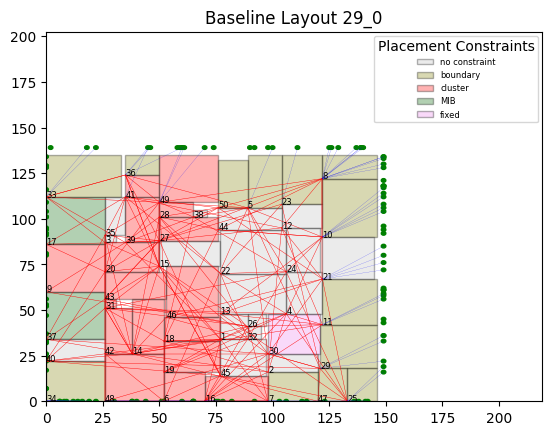

Processing FloorSet-Prime Batches:  30% 30/100 [00:28<01:20,  1.15s/it]

area-target data: torch.Size([1, 51]), pins_pos: torch.Size([1, 130, 2]), b2b_connectivity: torch.Size([1, 520, 3]), p2b_connectivity: torch.Size([1, 497, 3]), placement_constraints: torch.Size([1, 51, 5]) polygon_shapes: 51


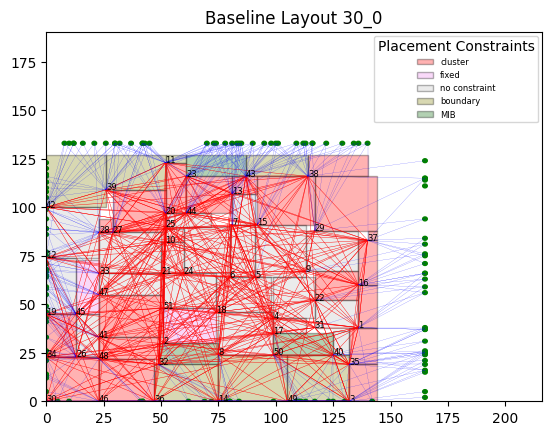

Processing FloorSet-Prime Batches:  31% 31/100 [00:29<01:29,  1.29s/it]

area-target data: torch.Size([1, 52]), pins_pos: torch.Size([1, 163, 2]), b2b_connectivity: torch.Size([1, 540, 3]), p2b_connectivity: torch.Size([1, 754, 3]), placement_constraints: torch.Size([1, 52, 5]) polygon_shapes: 52


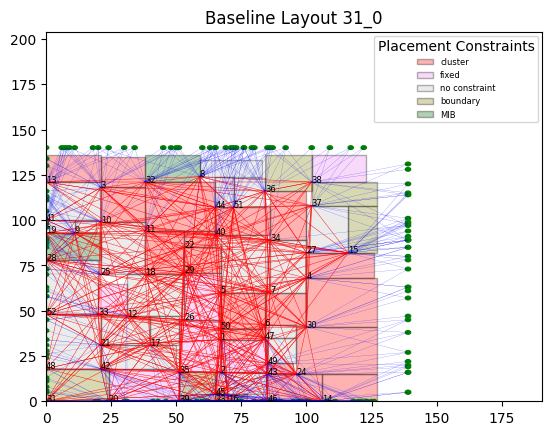

Processing FloorSet-Prime Batches:  32% 32/100 [00:31<01:41,  1.50s/it]

area-target data: torch.Size([1, 53]), pins_pos: torch.Size([1, 185, 2]), b2b_connectivity: torch.Size([1, 337, 3]), p2b_connectivity: torch.Size([1, 19, 3]), placement_constraints: torch.Size([1, 53, 5]) polygon_shapes: 53


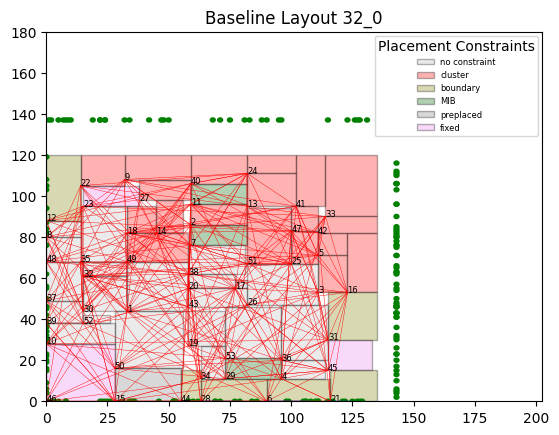

Processing FloorSet-Prime Batches:  33% 33/100 [00:33<01:37,  1.46s/it]

area-target data: torch.Size([1, 54]), pins_pos: torch.Size([1, 185, 2]), b2b_connectivity: torch.Size([1, 291, 3]), p2b_connectivity: torch.Size([1, 199, 3]), placement_constraints: torch.Size([1, 54, 5]) polygon_shapes: 54


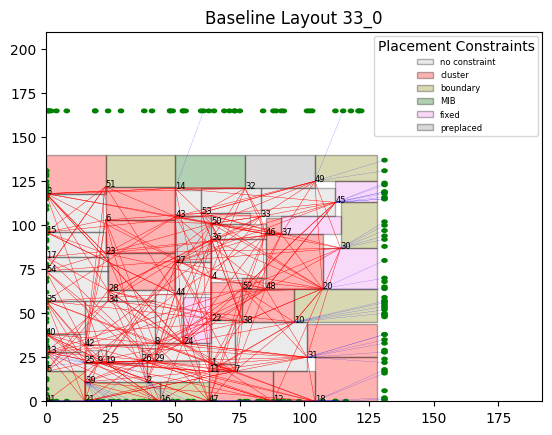

Processing FloorSet-Prime Batches:  34% 34/100 [00:34<01:35,  1.45s/it]

area-target data: torch.Size([1, 55]), pins_pos: torch.Size([1, 177, 2]), b2b_connectivity: torch.Size([1, 211, 3]), p2b_connectivity: torch.Size([1, 223, 3]), placement_constraints: torch.Size([1, 55, 5]) polygon_shapes: 55


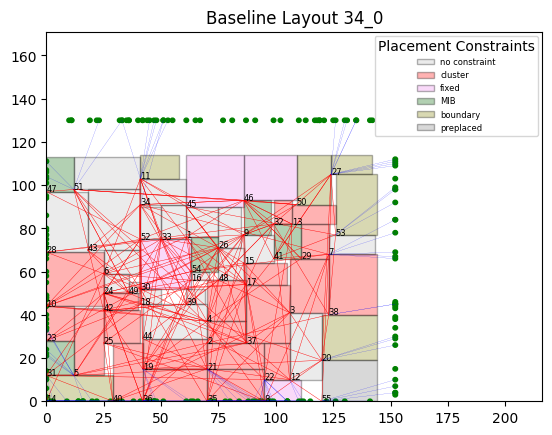

Processing FloorSet-Prime Batches:  35% 35/100 [00:35<01:30,  1.40s/it]

area-target data: torch.Size([1, 56]), pins_pos: torch.Size([1, 170, 2]), b2b_connectivity: torch.Size([1, 188, 3]), p2b_connectivity: torch.Size([1, 190, 3]), placement_constraints: torch.Size([1, 56, 5]) polygon_shapes: 56


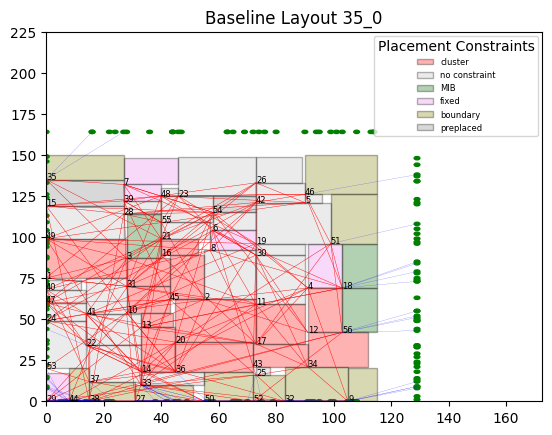

Processing FloorSet-Prime Batches:  36% 36/100 [00:37<01:28,  1.38s/it]

area-target data: torch.Size([1, 57]), pins_pos: torch.Size([1, 118, 2]), b2b_connectivity: torch.Size([1, 324, 3]), p2b_connectivity: torch.Size([1, 504, 3]), placement_constraints: torch.Size([1, 57, 5]) polygon_shapes: 57


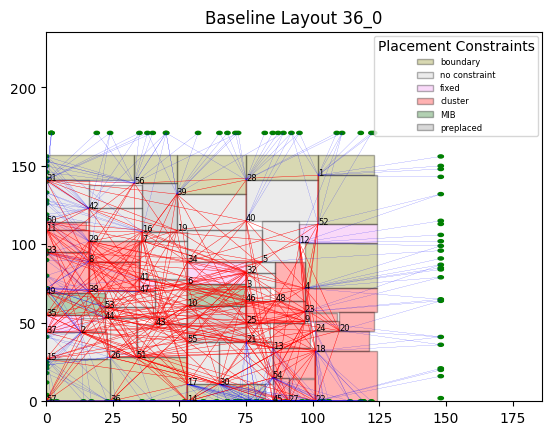

Processing FloorSet-Prime Batches:  37% 37/100 [00:38<01:28,  1.40s/it]

area-target data: torch.Size([1, 58]), pins_pos: torch.Size([1, 177, 2]), b2b_connectivity: torch.Size([1, 370, 3]), p2b_connectivity: torch.Size([1, 615, 3]), placement_constraints: torch.Size([1, 58, 5]) polygon_shapes: 58


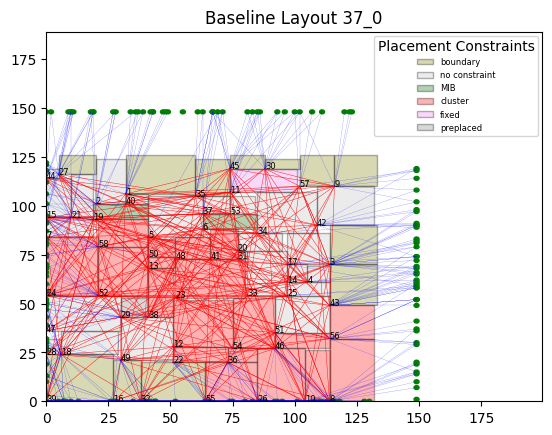

Processing FloorSet-Prime Batches:  38% 38/100 [00:40<01:34,  1.52s/it]

area-target data: torch.Size([1, 59]), pins_pos: torch.Size([1, 196, 2]), b2b_connectivity: torch.Size([1, 696, 3]), p2b_connectivity: torch.Size([1, 265, 3]), placement_constraints: torch.Size([1, 59, 5]) polygon_shapes: 59


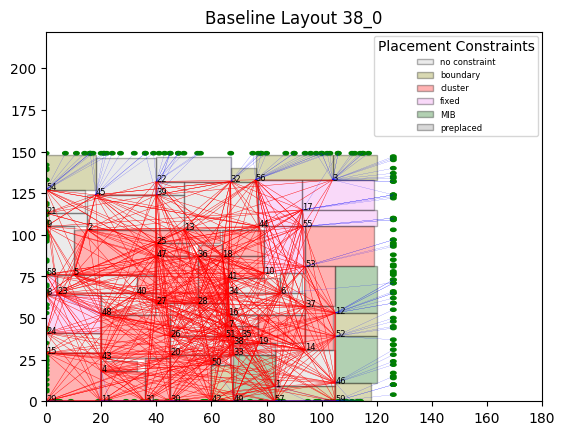

Processing FloorSet-Prime Batches:  39% 39/100 [00:42<01:39,  1.62s/it]

area-target data: torch.Size([1, 60]), pins_pos: torch.Size([1, 138, 2]), b2b_connectivity: torch.Size([1, 756, 3]), p2b_connectivity: torch.Size([1, 190, 3]), placement_constraints: torch.Size([1, 60, 5]) polygon_shapes: 60


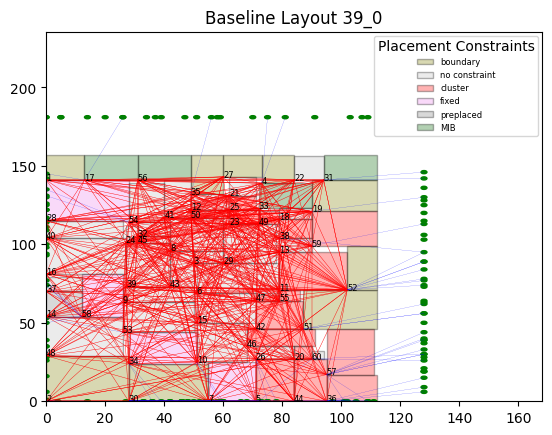

Processing FloorSet-Prime Batches:  40% 40/100 [00:43<01:37,  1.62s/it]

area-target data: torch.Size([1, 61]), pins_pos: torch.Size([1, 171, 2]), b2b_connectivity: torch.Size([1, 223, 3]), p2b_connectivity: torch.Size([1, 782, 3]), placement_constraints: torch.Size([1, 61, 5]) polygon_shapes: 61


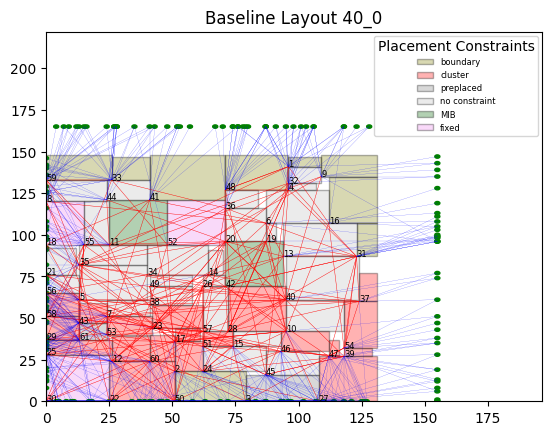

Processing FloorSet-Prime Batches:  41% 41/100 [00:45<01:38,  1.68s/it]

area-target data: torch.Size([1, 62]), pins_pos: torch.Size([1, 235, 2]), b2b_connectivity: torch.Size([1, 384, 3]), p2b_connectivity: torch.Size([1, 262, 3]), placement_constraints: torch.Size([1, 62, 5]) polygon_shapes: 62


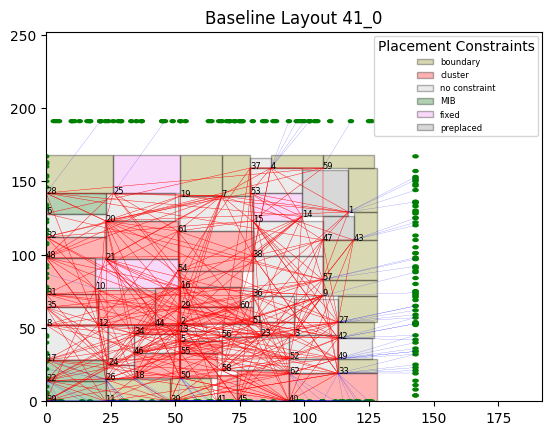

Processing FloorSet-Prime Batches:  42% 42/100 [00:47<01:38,  1.70s/it]

area-target data: torch.Size([1, 63]), pins_pos: torch.Size([1, 183, 2]), b2b_connectivity: torch.Size([1, 198, 3]), p2b_connectivity: torch.Size([1, 265, 3]), placement_constraints: torch.Size([1, 63, 5]) polygon_shapes: 63


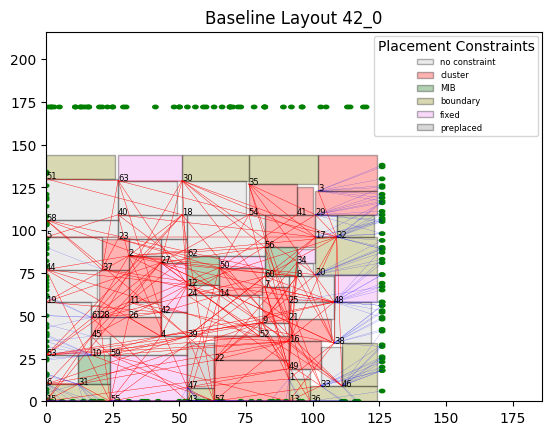

Processing FloorSet-Prime Batches:  43% 43/100 [00:48<01:32,  1.62s/it]

area-target data: torch.Size([1, 64]), pins_pos: torch.Size([1, 165, 2]), b2b_connectivity: torch.Size([1, 491, 3]), p2b_connectivity: torch.Size([1, 190, 3]), placement_constraints: torch.Size([1, 64, 5]) polygon_shapes: 64


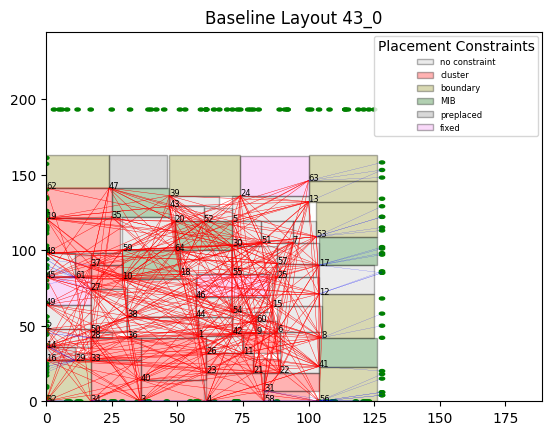

Processing FloorSet-Prime Batches:  44% 44/100 [00:50<01:29,  1.59s/it]

area-target data: torch.Size([1, 65]), pins_pos: torch.Size([1, 256, 2]), b2b_connectivity: torch.Size([1, 887, 3]), p2b_connectivity: torch.Size([1, 382, 3]), placement_constraints: torch.Size([1, 65, 5]) polygon_shapes: 65


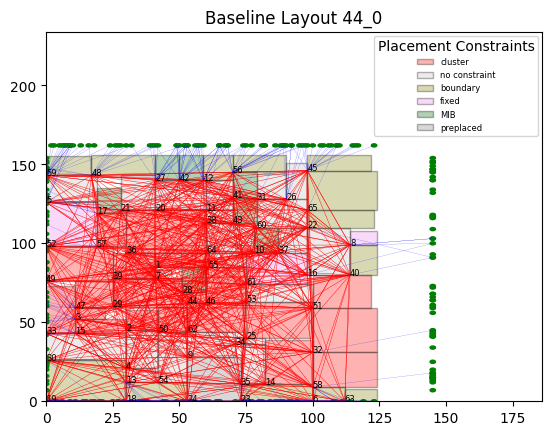

Processing FloorSet-Prime Batches:  45% 45/100 [00:52<01:39,  1.80s/it]

area-target data: torch.Size([1, 66]), pins_pos: torch.Size([1, 138, 2]), b2b_connectivity: torch.Size([1, 522, 3]), p2b_connectivity: torch.Size([1, 683, 3]), placement_constraints: torch.Size([1, 66, 5]) polygon_shapes: 66


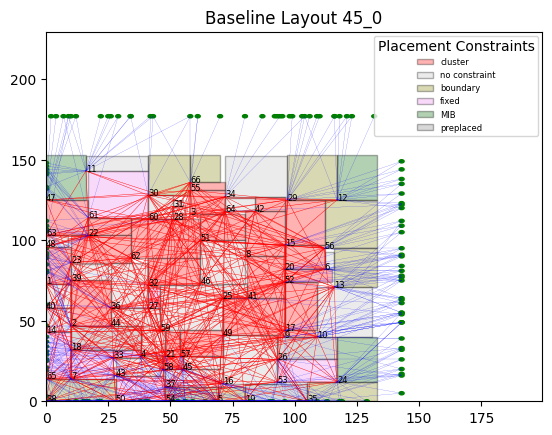

Processing FloorSet-Prime Batches:  46% 46/100 [00:54<01:38,  1.82s/it]

area-target data: torch.Size([1, 67]), pins_pos: torch.Size([1, 254, 2]), b2b_connectivity: torch.Size([1, 224, 3]), p2b_connectivity: torch.Size([1, 1276, 3]), placement_constraints: torch.Size([1, 67, 5]) polygon_shapes: 67


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import torch
from torch.utils.data import DataLoader
from test_dataset_lite import FloorplanDataset, floorplan_collate
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch, Circle
import matplotlib.patches as patches
from shapely.geometry import Polygon, LineString, Point
import copy
from visualize import get_hard_color, visualize_prime
from tqdm import tqdm


root = './'
ds = FloorplanDataset(root)

# Create DataLoader with no shuffling for effective file caching
dl = DataLoader(
ds, 
batch_size=1,#1-layout per configuration 
shuffle=False,
collate_fn=floorplan_collate
)

# Iterate over DataLoader
for batch_idx, batch in tqdm(enumerate(dl), total=len(dl), desc='Processing FloorSet-Lite Batches'):

    area_target, b2b_connectivity, p2b_connectivity, pins_pos, placement_constraints = batch[0]
    sol, metrics = batch[1]
    
    # Print sizes of data for debugging
    # area_target: bsz x n_blocks - Area targets for each block
    # b2b_connectivity: bsz x b2b_edges x edge-weight - Block-to-block connectivity
    # p2b_connectivity: bsz x p2b_edges x edge-weight - Pin-to-block connectivity
    # pins_pos: bsz x n_pins x 2 - Pins or terminals (x, y) location
    # placement_constraints: bsz x n_blocks x 5 - Constraints [fixed, preplaced, multi-instantiation, cluster, boundary]
    # sol: bsz x n_blocks - Polygon shape of each block (target solution) containing a list of polygon vertices for each block.
    # metrics: [area, num_pins, num_total_nets, num_b2b_nets, num_p2b_nets, num_hardconstraints, b2b_weighted_wl, p2b_weighted_wl]
    
    print(f'area-target data: {area_target.size()}, '
          f'pins_pos: {pins_pos.size()}, '
          f'b2b_connectivity: {b2b_connectivity.size()}, '
          f'p2b_connectivity: {p2b_connectivity.size()}, '
          f'placement_constraints: {placement_constraints.size()}',
          f'polygon_shapes: {len(sol[0])}')
    
    
    
    # Visualize results of the first samples of each batch
    for vis_ind in range(1):
        layout_ind = str(batch_idx)+'_'+str(vis_ind)
        visualize_prime(
            sol[vis_ind], 
            b2b_connectivity[vis_ind], 
            p2b_connectivity[vis_ind], 
            pins_pos[vis_ind], 
            placement_constraints[vis_ind],
            layout_ind
        )
    ##break







In [4]:
!ls

LICENSE		     intel_testsuite.md  requirements.txt
PrimeTensorDataTest  inteltest_layouts	 testLoader.py
README.md	     liteLoader.py	 test_dataset.py
Untitled.ipynb	     lite_dataset.py	 test_dataset_lite.py
__pycache__	     litetestLoader.py	 utils.py
cost.py		     notebooks		 validate.py
data		     primeLoader.py	 visualize.py
floorset_lite	     prime_dataset.py
images		     primetestLoader.py


In [58]:
batch_idx_to_access = 4395  # Change this to the index of the batch you want to access
batch_size = dl.batch_size  # Get the batch size from the DataLoader

# Calculate the start and end indices for the specific batch
start_idx = batch_idx_to_access * batch_size
end_idx = start_idx + batch_size
print('Start and end indicex::', start_idx, end_idx)
# Access the dataset from the DataLoader
dataset = dl.dataset
batch = [dataset[i] for i in range(start_idx, min(end_idx, len(dataset)))]
# for i in range(start_idx, end_idx):
#     D = dl.dataset[i]
#     print(D['input'][0].shape, D['input'][1].shape, D['input'][2].shape, D['input'][3].shape, D['input'][4].shape,)


Start and end indicex:: 562560 562688


In [59]:
area_target = [item['input'][0] for item in batch]
b2b_connectivity = [item['input'][1] for item in batch]
p2b_connectivity = [item['input'][2] for item in batch]
pins_pos = [item['input'][3] for item in batch]
placement_constraints = [item['input'][4] for item in batch]

tree_sol = [item['label'][0] for item in batch] 
fp_sol = [item['label'][1] for item in batch]
metrics_sol = [item['label'][2] for item in batch]

In [22]:
!rm -rf floorset_lite/

In [8]:
#add extra samples to make it 1M
import glob
worker_list = [55]

def get_layout_id(filepath):
    """Extract layout ID from filepath"""
    match = re.search(r'layouts_(\d+)\.th', filepath)
    return int(match.group(1)) if match else None

for worker_id in tqdm(worker_list, desc="Checking files", leave=True, position=0):
    try:
        print('Worker id:', worker_id)
        lite_files = glob.glob("./floorset_lite/worker_"+str(worker_id)+"/*")
        print('File list::', len(lite_files))
        if len(lite_files) == 90:
            print('Number of files in worker: ', worker_id, len(lite_files))
            for lfile in tqdm(lite_files, desc="Generating samples for extra batches"):
                # Load data
                D = torch.load(lfile)
                print(lfile, D[0].shape)
            
        

    except Exception as e:
        # Use tqdm.write instead of print for progress-bar-friendly output
        tqdm.write(f"Error loading worker {worker_id}: {str(e)}")




Checking files:   0% 0/1 [00:00<?, ?it/s]

Worker id: 55
File list:: 90
Number of files in worker:  55 90



Generating samples for extra batches:   0% 0/90 [00:00<?, ?it/s]
Generating samples for extra batches:  49% 44/90 [00:00<00:00, 439.57it/s]

./floorset_lite/worker_55/layouts_9744.th torch.Size([112, 75, 6])
./floorset_lite/worker_55/layouts_8400.th torch.Size([112, 114, 6])
./floorset_lite/worker_55/layouts_4928.th torch.Size([112, 96, 6])
./floorset_lite/worker_55/layouts_8960.th torch.Size([112, 47, 6])
./floorset_lite/worker_55/layouts_3920.th torch.Size([112, 79, 6])
./floorset_lite/worker_55/layouts_8512.th torch.Size([112, 36, 6])
./floorset_lite/worker_55/layouts_8736.th torch.Size([112, 113, 6])
./floorset_lite/worker_55/layouts_9072.th torch.Size([112, 35, 6])
./floorset_lite/worker_55/layouts_8624.th torch.Size([112, 119, 6])
./floorset_lite/worker_55/layouts_6496.th torch.Size([112, 109, 6])
./floorset_lite/worker_55/layouts_4368.th torch.Size([112, 96, 6])
./floorset_lite/worker_55/layouts_3360.th torch.Size([112, 55, 6])
./floorset_lite/worker_55/layouts_3808.th torch.Size([112, 22, 6])
./floorset_lite/worker_55/layouts_8848.th torch.Size([112, 54, 6])
./floorset_lite/worker_55/layouts_1680.th torch.Size([112,


Generating samples for extra batches:  98% 88/90 [00:00<00:00, 436.12it/s]

./floorset_lite/worker_55/layouts_2464.th torch.Size([112, 39, 6])
./floorset_lite/worker_55/layouts_7392.th torch.Size([112, 83, 6])


Generating samples for extra batches: 100% 90/90 [00:00<00:00, 439.07it/s]
Checking files: 100% 1/1 [00:00<00:00,  4.81it/s]

./floorset_lite/worker_55/layouts_4144.th torch.Size([112, 47, 6])
./floorset_lite/worker_55/layouts_5600.th torch.Size([112, 27, 6])


In [14]:
D = torch.load('./floorset_lite/worker_55/layouts_9968.th')


In [19]:
type(D[0])

numpy.ndarray

In [83]:
##tens_list = (area_target, b2b_connectivity, p2b_connectivity, pins_pos, placement_constraints, tree_sol, fp_sol, metrics_sol)
import torch.nn.functional as F

def pad_to_largest_local(tens_list):
    ndims = tens_list[0].ndim
    print('ndims::', ndims)
    max_dims = [max(x.size(dim) for x in tens_list)
                for dim in range(ndims)]
    print('Max dims:', max_dims)
    padded_tensors = []
    for tens in tens_list:
        padding_tuple = tuple(x for d in range(ndims)
                              for x in (max_dims[d] - tens.size(d), 0))
        if tens.dtype == torch.bool:
            pad_value = False
        else:
            pad_value = -1
        padded_tensors.append(
            F.pad(tens, padding_tuple[::-1], value=pad_value))
    return torch.stack(padded_tensors)
##map(pad_to_largest_local, (area_target, b2b_connectivity, p2b_connectivity, pins_pos, placement_constraints, tree_sol, fp_sol, metrics_sol))
# Assuming all tensors are in a tuple
tens_list = (area_target, b2b_connectivity, p2b_connectivity, pins_pos, placement_constraints, tree_sol, fp_sol, metrics_sol)

# Call the function with the entire list of tensors
for j in range(len(tens_list)):
    padded_tensors = pad_to_largest_local(tens_list[j])
    print(padded_tensors.shape)

ndims:: 1
Max dims: [97]
torch.Size([128, 97])
ndims:: 2
Max dims: [3058, 3]
torch.Size([128, 3058, 3])
ndims:: 2
Max dims: [989, 3]
torch.Size([128, 989, 3])
ndims:: 2
Max dims: [357, 2]
torch.Size([128, 357, 2])
ndims:: 2
Max dims: [97, 5]
torch.Size([128, 97, 5])
ndims:: 2
Max dims: [96, 3]
torch.Size([128, 96, 3])
ndims:: 2
Max dims: [97, 4]
torch.Size([128, 97, 4])
ndims:: 1
Max dims: [8]
torch.Size([128, 8])


In [71]:
padded_tensors

tensor([[323., 140., 650.,  ..., 598., 120., 176.],
        [323., 140., 650.,  ..., 598., 120., 176.],
        [323., 140., 650.,  ..., 598., 120., 176.],
        ...,
        [ 81., 600., 340.,  ...,  -1.,  -1.,  -1.],
        [ 81., 600., 340.,  ...,  -1.,  -1.,  -1.],
        [ 81., 600., 340.,  ...,  -1.,  -1.,  -1.]])

In [29]:
D[6]

array([[1.99800000e+04, 2.45000000e+02, 1.10100000e+03, 8.19000000e+02,
        2.82000000e+02, 5.80000000e+01, 9.58205032e+01, 2.89718556e+00],
       [1.85500000e+04, 2.45000000e+02, 1.10100000e+03, 8.19000000e+02,
        2.82000000e+02, 6.30000000e+01, 9.38989105e+01, 2.69844913e+00],
       [2.08800000e+04, 2.45000000e+02, 1.10100000e+03, 8.19000000e+02,
        2.82000000e+02, 5.80000000e+01, 9.45163727e+01, 2.71797824e+00],
       [1.73630000e+04, 2.45000000e+02, 1.10100000e+03, 8.19000000e+02,
        2.82000000e+02, 5.50000000e+01, 1.01910393e+02, 3.28403211e+00],
       [1.98240000e+04, 2.45000000e+02, 1.10100000e+03, 8.19000000e+02,
        2.82000000e+02, 6.00000000e+01, 1.01639862e+02, 3.11803555e+00],
       [2.22720000e+04, 2.45000000e+02, 1.10100000e+03, 8.19000000e+02,
        2.82000000e+02, 5.90000000e+01, 1.07647614e+02, 3.02039051e+00],
       [2.11140000e+04, 2.45000000e+02, 1.10100000e+03, 8.19000000e+02,
        2.82000000e+02, 5.40000000e+01, 1.02117172e+02, 3.